In [1]:
## Import modules/libraries
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from datetime import date, timedelta

%cd '/home/jovyan/dev/dea-notebooks/Claire/Qld_DES_files/'

/home/jovyan/dev/dea-notebooks/Claire/Qld_DES_files


In [27]:
%store -r classes_df2

In [79]:
classes_df

,pixels,water,unveg,ndvi_low,ndvi_mid,ndvi_high,px_sum,tide_height,pc_water,pc_unveg,pc_ndvi_low,pc_ndvi_mid,pc_ndvi_high,pc_total,pc_exposedpx
key_0,,,,,,,,,,,,,,,
1988-01-22 23:28:16.039754,175,2,30,143,0,0,175,-1.582,1.142857,17.142857,81.714286,0.0,0.0,100.0,98.857143
1988-05-06 23:23:35.245305,180,1,14,165,0,0,180,-1.746,0.555556,7.777778,91.666667,0.0,0.0,100.0,99.444444
1988-08-01 23:29:47.732775,180,0,34,146,0,0,180,-2.123,0.000000,18.888889,81.111111,0.0,0.0,100.0,100.000000
1988-09-02 23:29:51.559239,180,1,40,139,0,0,180,-1.343,0.555556,22.222222,77.222222,0.0,0.0,100.0,99.444444
1988-11-14 23:23:52.322547,180,37,80,63,0,0,180,-1.378,20.555556,44.444444,35.000000,0.0,0.0,100.0,79.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-18 23:53:08.367833,180,8,74,98,0,0,180,-1.059,4.444444,41.111111,54.444444,0.0,0.0,100.0,95.555556
2021-07-27 23:59:05.467645,177,26,102,49,0,0,177,-1.295,14.689266,57.627119,27.683616,0.0,0.0,100.0,85.310734
2021-08-12 23:59:12.077358,180,23,54,103,0,0,180,-1.431,12.777778,30.000000,57.222222,0.0,0.0,100.0,87.222222


In [49]:
# ## Open Sentinel imagery results

# with open('Burrum_Heads_polygons_imagery_results2dict.pickle', 'wb') as handle:
with open('Townsville_Sentinel2_results2_withtemporalstats_2013-01-01_.pickle', 'rb') as handle:
    S2_results2 = pickle.load(handle)
#     pickle.dump(results2, handle)

In [5]:
# ## Open Landsat imagery results

# with open('Burrum_Heads_polygons_imagery_results2dict.pickle', 'rb') as handle:
with open('Townsville_Landsat_results2_withtemporalstats_1988-01-01_.pickle', 'rb') as handle:
    results2 = pickle.load(handle)
#     pickle.dump(results2, handle)

EOFError: Ran out of input

In [3]:
## Import seagrass watch point data
%cd '/home/jovyan/dev/dea-notebooks/Claire/Qld_DES_files'
# point_data = 'Manual_translation_of BH1_and_BH3_pc_seagrass_cover_from_seagrasswatchdotorg.csv'
point_data = 'WheelansHut_pcCover.csv'
# point_data = 'Manual_translation_of_Urangan_data_from_seagrasswaterdotorg.csv'
field_df = pd.read_csv(point_data)
# # Remove empty rows
# field_df = field_df.loc[0:56]
## Turn string dates into datetimes
field_df['time'] = pd.to_datetime(field_df['Date'], format='%b-%y')
## Replace index
field_df.set_index(field_df.time, inplace=True)

/home/jovyan/dev/dea-notebooks/Claire/Qld_DES_files


In [52]:
# field_df
# results2['30']['2'] 140,3;
pgid = []
feat = []

for k in S2_results2:
#     print (k)
    pgid.append(k)
    for kk in S2_results2[k]:
#         print(kk)
        feat.append(kk)
        
# print(pgid, feat)

In [53]:
## Sentinel2 results - three polygon dataset
## This cell processes datasets that contain results for two polygons (pg1, pg2)

pg1_NDVI = S2_results2[pgid[0]][feat[0]].resample(time='1MS').mean(dim='time')
pg1_NDVI = pg1_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
pg1_NDVI = pg1_NDVI.to_dataframe()
pg1_NDVI = pg1_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'S2_pg1_NDVI'})
S2_pg1_NDVI = pg1_NDVI.drop('spatial_ref', axis=1)
# BH1_NDVI.head()


pg2_NDVI = S2_results2[pgid[1]][feat[1]].resample(time='1MS').mean(dim='time')
pg2_NDVI = pg2_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
pg2_NDVI = pg2_NDVI.to_dataframe()
pg2_NDVI = pg2_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'S2_pg2_NDVI'})
S2_pg2_NDVI = pg2_NDVI.drop('spatial_ref', axis=1)
# BH3_NDVI.head()

pg3_NDVI = S2_results2[pgid[2]][feat[2]].resample(time='1MS').mean(dim='time')
pg3_NDVI = pg3_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
pg3_NDVI = pg3_NDVI.to_dataframe()
pg3_NDVI = pg3_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'S2_pg3_NDVI'})
S2_pg3_NDVI = pg3_NDVI.drop('spatial_ref', axis=1)
# BH3_NDVI.head()

## Create empty continuous daterange to join dataframes to
start, end = date(1988, 8, 1), date(2021, 9, 1)
date_range = pd.date_range(start, end, freq = 'MS')

## Create master dataframe, 'alldates'
S2_alldates = pd.DataFrame(index=date_range)

## Join pg1
S2_alldates = S2_alldates.join(S2_pg1_NDVI, how='left')

## Join pg2
S2_alldates_pg1_pg2 = S2_alldates.join(S2_pg2_NDVI, how='left')

## Join pg3
S2_alldates_pg1_pg2_pg3 = S2_alldates_pg1_pg2.join(S2_pg3_NDVI, how='left')

# ## Join field_df (seagrasswatch observations)
# S2_alldates_all = S2_alldates_BH1_BH3.join(field_df, how='left')

# S2_alldates_pg1_pg2

In [38]:
## Sentinel2 results - two polygon dataset
## This cell processes datasets that contain results for two polygons (pg1, pg2)

pg1_NDVI = S2_results2[pgid[0]][feat[0]].resample(time='1MS').mean(dim='time')
pg1_NDVI = pg1_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
pg1_NDVI = pg1_NDVI.to_dataframe()
pg1_NDVI = pg1_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'S2_pg1_NDVI'})
S2_pg1_NDVI = pg1_NDVI.drop('spatial_ref', axis=1)
# BH1_NDVI.head()


pg2_NDVI = S2_results2[pgid[1]][feat[1]].resample(time='1MS').mean(dim='time')
pg2_NDVI = pg2_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
pg2_NDVI = pg2_NDVI.to_dataframe()
pg2_NDVI = pg2_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'S2_pg2_NDVI'})
S2_pg2_NDVI = pg2_NDVI.drop('spatial_ref', axis=1)
# BH3_NDVI.head()

## Create empty continuous daterange to join dataframes to
start, end = date(1988, 8, 1), date(2021, 9, 1)
date_range = pd.date_range(start, end, freq = 'MS')

## Create master dataframe, 'alldates'
S2_alldates = pd.DataFrame(index=date_range)

## Join BH1
S2_alldates = S2_alldates.join(S2_pg1_NDVI, how='left')

## Join BH3
S2_alldates_pg1_pg2 = S2_alldates.join(S2_pg2_NDVI, how='left')

# ## Join field_df (seagrasswatch observations)
# S2_alldates_all = S2_alldates_BH1_BH3.join(field_df, how='left')

# S2_alldates_pg1_pg2

In [39]:
# ## Sentinel2 results - one polygon dataset
# ## This cell processes datasets that contain results for two polygons (pg1, pg2)

# pg1_NDVI = S2_results2[pgid[0]][feat[0]].resample(time='1MS').mean(dim='time')
# pg1_NDVI = pg1_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
# pg1_NDVI = pg1_NDVI.to_dataframe()
# pg1_NDVI = pg1_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'S2_pg1_NDVI'})
# S2_pg1_NDVI = pg1_NDVI.drop('spatial_ref', axis=1)
# # BH1_NDVI.head()

# ## Create empty continuous daterange to join dataframes to
# start, end = date(1988, 8, 1), date(2021, 9, 1)
# date_range = pd.date_range(start, end, freq = 'MS')

# ## Create master dataframe, 'alldates'
# S2_alldates = pd.DataFrame(index=date_range)

# ## Join BH1
# S2_alldates = S2_alldates.join(S2_pg1_NDVI, how='left')

# # ## Join BH3
# # S2_alldates_pg1_pg2 = S2_alldates.join(S2_pg2_NDVI, how='left')

# # # ## Join field_df (seagrasswatch observations)
# # # S2_alldates_all = S2_alldates_BH1_BH3.join(field_df, how='left')

# # # S2_alldates_pg1_pg2

In [54]:
## Landsat - three polygon dataset

pg1_NDVI = results2[pgid[0]][feat[0]].resample(time='1MS').mean(dim='time')
pg1_NDVI = pg1_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
pg1_NDVI = pg1_NDVI.to_dataframe()
pg1_NDVI = pg1_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'LS_pg1_NDVI'})
pg1_NDVI = pg1_NDVI.drop('spatial_ref', axis=1)



pg2_NDVI = results2[pgid[1]][feat[1]].resample(time='1MS').mean(dim='time')
pg2_NDVI = pg2_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
pg2_NDVI = pg2_NDVI.to_dataframe()
pg2_NDVI = pg2_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'LS_pg2_NDVI'})
pg2_NDVI = pg2_NDVI.drop('spatial_ref', axis=1)

pg3_NDVI = results2[pgid[2]][feat[2]].resample(time='1MS').mean(dim='time')
pg3_NDVI = pg3_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
pg3_NDVI = pg3_NDVI.to_dataframe()
pg3_NDVI = pg3_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'LS_pg3_NDVI'})
pg3_NDVI = pg3_NDVI.drop('spatial_ref', axis=1)

## Create empty continuous daterange to join dataframes to
start, end = date(1988, 8, 1), date(2021, 9, 1)
date_range = pd.date_range(start, end, freq = 'MS')

## Create master dataframe, 'alldates'
alldates = pd.DataFrame(index=date_range)

## Join pg1
alldates = alldates.join(pg1_NDVI, how='left')

## Join pg2
LS_alldates_pg1_pg2 = alldates.join(pg2_NDVI, how='left')

## Join pg2
LS_alldates_pg1_pg2_pg3 = LS_alldates_pg1_pg2.join(pg3_NDVI, how='left')

# ## Join field_df (seagrasswatch observations)
# LS_alldates_all = alldates_BH1_BH3.join(field_df, how='left')

In [41]:
## Landsat - two polygon dataset

pg1_NDVI = results2[pgid[0]][feat[0]].resample(time='1MS').mean(dim='time')
pg1_NDVI = pg1_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
pg1_NDVI = pg1_NDVI.to_dataframe()
pg1_NDVI = pg1_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'LS_pg1_NDVI'})
pg1_NDVI = pg1_NDVI.drop('spatial_ref', axis=1)



pg2_NDVI = results2[pgid[1]][feat[1]].resample(time='1MS').mean(dim='time')
pg2_NDVI = pg2_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
pg2_NDVI = pg2_NDVI.to_dataframe()
pg2_NDVI = pg2_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'LS_pg2_NDVI'})
pg2_NDVI = pg2_NDVI.drop('spatial_ref', axis=1)


## Create empty continuous daterange to join dataframes to
start, end = date(1988, 8, 1), date(2021, 9, 1)
date_range = pd.date_range(start, end, freq = 'MS')

## Create master dataframe, 'alldates'
alldates = pd.DataFrame(index=date_range)

## Join BH1
alldates = alldates.join(pg1_NDVI, how='left')

## Join BH3
LS_alldates_pg1_pg2 = alldates.join(pg2_NDVI, how='left')

# ## Join field_df (seagrasswatch observations)
# LS_alldates_all = alldates_BH1_BH3.join(field_df, how='left')

In [42]:
# ## Landsat - one polygon dataset

# pg1_NDVI = results2[pgid[0]][feat[0]].resample(time='1MS').mean(dim='time')
# pg1_NDVI = pg1_NDVI.NDVI_zonal_timestep_median.dropna(dim='time')
# pg1_NDVI = pg1_NDVI.to_dataframe()
# pg1_NDVI = pg1_NDVI.rename(columns={'NDVI_zonal_timestep_median': 'LS_pg1_NDVI'})
# pg1_NDVI = pg1_NDVI.drop('spatial_ref', axis=1)

# ## Create empty continuous daterange to join dataframes to
# start, end = date(1988, 8, 1), date(2021, 9, 1)
# date_range = pd.date_range(start, end, freq = 'MS')

# ## Create master dataframe, 'alldates'
# alldates = pd.DataFrame(index=date_range)

# ## Join BH1
# LS_alldates = alldates.join(pg1_NDVI, how='left')


In [58]:
## Blend the Landsat and Sentinel results - three polygon dataset
blended = LS_alldates_pg1_pg2_pg3.join(S2_alldates_pg1_pg2_pg3, how='left')

## Blend the satellite results with the field data
Blended = pd.merge(blended, field_df, left_on=blended.index, right_on=field_df.index)
Blended.drop('key_0', axis=1)
Blended.set_index('time', drop=True)

,key_0,LS_pg1_NDVI,LS_pg2_NDVI,LS_pg3_NDVI,S2_pg1_NDVI,S2_pg2_NDVI,S2_pg3_NDVI,Date,BB1% seagrass cover,SB1 % seagrass cover,SB2 % seagrass cover
time,,,,,,,,,,,
2001-04-01,2001-04-01,NaN,NaN,NaN,NaN,NaN,NaN,Apr-01,NaN,NaN,6.0
2001-07-01,2001-07-01,NaN,0.089752,0.116041,NaN,NaN,NaN,Jul-01,NaN,NaN,18.1
2001-09-01,2001-09-01,0.077944,0.145424,0.120228,NaN,NaN,NaN,Sep-01,NaN,1.2,35.8
2001-11-01,2001-11-01,NaN,NaN,NaN,NaN,NaN,NaN,Nov-01,NaN,NaN,23.8
2002-01-01,2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Jan-02,NaN,NaN,20.7
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-01,2019-05-01,NaN,NaN,NaN,NaN,NaN,NaN,May-19,16.3,2.6,16.5
2019-09-01,2019-09-01,0.079334,0.114625,0.109908,0.068073,0.109244,0.109467,Sep-19,17.2,0.0,17.5
2020-05-01,2020-05-01,NaN,NaN,NaN,0.076477,0.134911,0.148936,May-20,23.8,1.8,12.3


In [44]:
## Blend the Landsat and Sentinel results - two polygon dataset
blended = LS_alldates_pg1_pg2.join(S2_alldates_pg1_pg2, how='left')

## Blend the satellite results with the field data
Blended = pd.merge(blended, field_df, left_on=blended.index, right_on=field_df.index)
Blended.drop('key_0', axis=1)
Blended.set_index('time', drop=True)

,key_0,LS_pg1_NDVI,LS_pg2_NDVI,S2_pg1_NDVI,S2_pg2_NDVI,Date,GH1 % seagrass cover,GH2 % seagrass cover
time,,,,,,,,
2005-10-01,2005-10-01,NaN,NaN,NaN,NaN,Oct-05,28.0,34.5
2006-04-01,2006-04-01,0.090909,0.093023,NaN,NaN,Apr-06,1.7,0.3
2006-10-01,2006-10-01,0.085258,0.082552,NaN,NaN,Oct-06,15.3,1.6
2007-05-01,2007-05-01,NaN,NaN,NaN,NaN,May-07,16.9,5.1
2007-09-01,2007-09-01,NaN,NaN,NaN,NaN,Sep-07,38.2,11.6
2008-04-01,2008-04-01,0.106834,0.107143,NaN,NaN,Apr-08,22.3,12.8
2008-10-01,2008-10-01,NaN,NaN,NaN,NaN,Oct-08,36.7,32.5
2009-03-01,2009-03-01,NaN,NaN,NaN,NaN,Mar-09,14.8,11.3
2009-10-01,2009-10-01,NaN,NaN,NaN,NaN,Oct-09,28.7,32.9


In [30]:
# ## Blend the Burrum Heads Landsat and Sentinel results - one polygon dataset
# blended = LS_alldates.join(S2_alldates, how='left')

# ## Blend the satellite results with the field data
# Blended = pd.merge(blended, field_df, left_on=blended.index, right_on=field_df.index)
# Blended.drop('key_0', axis=1)
# Blended.set_index('time', drop=True)

In [59]:
## Save blended NDVI vs field data results

with open('Townsville_blended_NDVI_vs_field_df_.pickle', 'wb') as handle:
    pickle.dump(Blended, handle)

In [60]:
## temp
# print(results2.keys())
print(Blended.columns)

Index(['key_0', 'LS_pg1_NDVI', 'LS_pg2_NDVI', 'LS_pg3_NDVI', 'S2_pg1_NDVI',
       'S2_pg2_NDVI', 'S2_pg3_NDVI', 'Date', 'BB1% seagrass cover',
       'SB1 % seagrass cover', 'SB2 % seagrass cover', 'time'],
      dtype='object')


In [ ]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2, figsize=(15,20))
# fig, ((ax1,ax3,ax5,ax7),(ax2,ax4,ax6,ax8)) = plt.subplots(2,4, figsize=(20,10))
# fig, ((ax1,ax3),(ax2,ax4)) = plt.subplots(2,2, figsize=(10,10))

Blended.plot(x='LS_pg1_NDVI', y=Blended.columns[-3], kind='scatter',ax=ax1, color='red', xlabel='NDVI')
# Blended.plot(x='LS_pg1_NDVI', y='BH1 Canopy height (cm)', kind='scatter',ax=ax2, color='red')
Blended.plot(x='LS_pg2_NDVI', y=Blended.columns[-2], kind='scatter',ax=ax3, color='red', xlabel='NDVI')
# Blended.plot(x='LS_pg2_NDVI', y='BH3 Canopy height (cm)', kind='scatter',ax=ax4, color='red')
# Blended.plot(x='LS_pg3_NDVI', y=Blended.columns[-3], kind='scatter',ax=ax5, color='red', xlabel='NDVI')
# Blended.plot(x='LS_pg1_NDVI', y='BH3 % algae cover', kind='scatter',ax=ax6, color='red')
# Blended.plot(x='LS_pg2_NDVI', y='BH1 % epiphyte cover', kind='scatter',ax=ax7, color='red')
# Blended.plot(x='LS_pg2_NDVI', y='BH3 % epiphyte cover', kind='scatter',ax=ax8, color='red')

Blended.plot(x='S2_pg1_NDVI', y=Blended.columns[-3], kind='scatter',ax=ax1, color='red', xlabel='NDVI')
# Blended.plot(x='S2_pg1_NDVI'', y='BH1 Canopy height (cm)', kind='scatter',ax=ax2, color='red')
Blended.plot(x='S2_pg2_NDVI', y=Blended.columns[-2], kind='scatter',ax=ax3, color='red', xlabel='NDVI')
# Blended.plot(x='S2_BH3_NDVI', y='BH3 Canopy height (cm)', kind='scatter',ax=ax4, color='red')
# Blended.plot(x='S2_pg3_NDVI', y=Blended.columns[-3], kind='scatter',ax=ax5, color='red', xlabel='NDVI')
# Blended.plot(x='S2_pg1_NDVI'', y='BH3 % algae cover', kind='scatter',ax=ax6, color='red')
# Blended.plot(x='S2_BH3_NDVI', y='BH1 % epiphyte cover', kind='scatter',ax=ax7, color='red')
# Blended.plot(x='S2_BH3_NDVI', y='BH3 % epiphyte cover', kind='scatter',ax=ax8, color='red')

ax1.set_ylim(ymax=50)
ax3.set_ylim(ymax=50)
ax5.set_ylim(ymax=50)

ax1.set_xlim(xmin=0.0, xmax=0.50)
ax3.set_xlim(xmin=0.0, xmax=0.50)
ax5.set_xlim(xmin=0.0, xmax=0.50)

# for k in Blended.iterrows(): 
#     ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][6]))
#     ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][3], k[1][6]))
# #     ax2.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][8]))
#     ax3.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][2], k[1][7]))
#     ax3.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][4], k[1][7]))


# ax1.set_xlim(xmin=0, xmax=0.12)
# ax1.set_ylim(ymin=0, ymax=30)
# ax3.set_xlim(xmin=0, xmax=0.12)
# ax3.set_ylim(ymin=0, ymax=30)

# ax2.set_xlim(xmin=0, xmax=0.12)
# ax2.set_ylim(ymin=0, ymax=5)
# ax4.set_xlim(xmin=0, xmax=0.12)
# ax4.set_ylim(ymin=0, ymax=5)
    
ax1.set_title('% seagrass cover')
# ax1.xlabel('NDVI')
# ax2.set_title('Canopy height (cm)')
# ax5.set_title('% algae cover')
# ax6.set_title('% epiphyte cover')

# ax1.set_xticklabels('NDVI')

In [ ]:
# S2_results2

## Rebuild to compare NDCI against field data
Blended

In [ ]:
## Sentinel2 results
## This cell processes datasets that contain results for two polygons (pg1, pg2)

pg1_NDCI = S2_results2[pgid[0]][feat[0]].resample(time='1MS').mean(dim='time')
pg1_NDCI = pg1_NDCI.NDCI_zonal_timestep_median.dropna(dim='time')
pg1_NDCI = pg1_NDCI.to_dataframe()
pg1_NDCI = pg1_NDCI.rename(columns={'NDCI_zonal_timestep_median': 'S2_pg1_NDCI'})
S2_pg1_NDCI = pg1_NDCI.drop('spatial_ref', axis=1)
# BH1_NDVI.head()


pg2_NDCI = S2_results2[pgid[1]][feat[1]].resample(time='1MS').mean(dim='time')
pg2_NDCI = pg2_NDCI.NDCI_zonal_timestep_median.dropna(dim='time')
pg2_NDCI = pg2_NDCI.to_dataframe()
pg2_NDCI = pg2_NDCI.rename(columns={'NDCI_zonal_timestep_median': 'S2_pg2_NDCI'})
S2_pg2_NDCI = pg2_NDCI.drop('spatial_ref', axis=1)
# BH3_NDVI.head()

pg3_NDCI = S2_results2[pgid[2]][feat[2]].resample(time='1MS').mean(dim='time')
pg3_NDCI = pg3_NDCI.NDCI_zonal_timestep_median.dropna(dim='time')
pg3_NDCI = pg3_NDCI.to_dataframe()
pg3_NDCI = pg3_NDCI.rename(columns={'NDCI_zonal_timestep_median': 'S2_pg3_NDCI'})
S2_pg3_NDCI = pg3_NDCI.drop('spatial_ref', axis=1)

## Create empty continuous daterange to join dataframes to
start, end = date(1988, 8, 1), date(2021, 9, 1)
date_range = pd.date_range(start, end, freq = 'MS')

## Create master dataframe, 'alldates'
S2_alldates = pd.DataFrame(index=date_range)

## Join pg1
S2_alldates = S2_alldates.join(S2_pg1_NDCI, how='left')

## Join pg2
S2_alldates_pg1_pg2 = S2_alldates.join(S2_pg2_NDCI, how='left')

## Join pg3
S2_alldates_pg1_pg2_pg3 = S2_alldates_pg1_pg2.join(S2_pg3_NDCI, how='left')

# # ## Join field_df (seagrasswatch observations)
# S2_alldates_all = S2_alldates_pg1_pg2.join(field_df, how='left')

# S2_alldates_pg1_pg2

S2_alldates_all = pd.merge(S2_alldates_pg1_pg2_pg3, field_df, left_on=S2_alldates_pg1_pg2_pg3.index, right_on=field_df.index)

S2_alldates_all.drop('key_0', axis=1)
S2_alldates_all.set_index('time', drop=True)

S2_alldates_all

In [ ]:
fig, ((ax1),(ax3),(ax5)) = plt.subplots(3,1, figsize=(6,12))
# fig, ((ax1,ax3,ax5,ax7),(ax2,ax4,ax6,ax8)) = plt.subplots(2,4, figsize=(20,10))
# fig, ((ax1,ax3),(ax2,ax4)) = plt.subplots(2,2, figsize=(10,10))

S2_alldates_all.plot(x=S2_alldates_all.columns[1], y=S2_alldates_all.columns[-4], kind='scatter',ax=ax1, color='red', xlabel='NDCI')
S2_alldates_all.plot(x=S2_alldates_all.columns[1], y=S2_alldates_all.columns[-2], kind='scatter',ax=ax3, color='red', xlabel='NDCI')
S2_alldates_all.plot(x=S2_alldates_all.columns[1], y=S2_alldates_all.columns[-3], kind='scatter',ax=ax5, color='red', xlabel='NDCI')


ax1.set_ylim(ymax=50)
ax3.set_ylim(ymax=50)
ax5.set_ylim(ymax=50)

ax1.set_xlim(xmin=0.0, xmax=0.50)
ax3.set_xlim(xmin=0.0, xmax=0.50)
ax5.set_xlim(xmin=0.0, xmax=0.50)

# for k in S2_alldates_all.iterrows(): 
#     ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][4]))
#     ax3.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][2], k[1][5]))


# ax1.set_xlim(xmin=0, xmax=0.12)
# ax1.set_ylim(ymin=0, ymax=30)
# ax3.set_xlim(xmin=0, xmax=0.12)
# ax3.set_ylim(ymin=0, ymax=30)

# ax2.set_xlim(xmin=0, xmax=0.12)
# ax2.set_ylim(ymin=0, ymax=5)
# ax4.set_xlim(xmin=0, xmax=0.12)
# ax4.set_ylim(ymin=0, ymax=5)
    
ax1.set_title('% seagrass cover')
# ax1.xlabel('NDVI')
# ax2.set_title('Canopy height (cm)')
# ax5.set_title('% algae cover')
# ax6.set_title('% epiphyte cover')

# ax1.set_xticklabels('NDVI')

In [ ]:
## temp
S2_pg1_NDCI 

In [ ]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2, figsize=(15,20))
# fig, ((ax1,ax3,ax5,ax7),(ax2,ax4,ax6,ax8)) = plt.subplots(2,4, figsize=(20,10))
# fig, ((ax1,ax3),(ax2,ax4)) = plt.subplots(2,2, figsize=(10,10))

Blended.plot(x='LS_BH1_NDVI', y='BH1 % seagrass cover', kind='scatter',ax=ax1, color='red')
Blended.plot(x='LS_BH1_NDVI', y='BH1 Canopy height (cm)', kind='scatter',ax=ax2, color='red')
Blended.plot(x='LS_BH3_NDVI', y='BH3 % seagrass cover', kind='scatter',ax=ax3, color='red')
Blended.plot(x='LS_BH3_NDVI', y='BH3 Canopy height (cm)', kind='scatter',ax=ax4, color='red')
Blended.plot(x='LS_BH1_NDVI', y='BH1 % algae cover', kind='scatter',ax=ax5, color='red')
Blended.plot(x='LS_BH1_NDVI', y='BH3 % algae cover', kind='scatter',ax=ax6, color='red')
Blended.plot(x='LS_BH3_NDVI', y='BH1 % epiphyte cover', kind='scatter',ax=ax7, color='red')
Blended.plot(x='LS_BH3_NDVI', y='BH3 % epiphyte cover', kind='scatter',ax=ax8, color='red')

Blended.plot(x='S2_BH1_NDVI', y='BH1 % seagrass cover', kind='scatter',ax=ax1, color='red')
Blended.plot(x='S2_BH1_NDVI', y='BH1 Canopy height (cm)', kind='scatter',ax=ax2, color='red')
Blended.plot(x='S2_BH3_NDVI', y='BH3 % seagrass cover', kind='scatter',ax=ax3, color='red')
Blended.plot(x='S2_BH3_NDVI', y='BH3 Canopy height (cm)', kind='scatter',ax=ax4, color='red')
Blended.plot(x='S2_BH1_NDVI', y='BH1 % algae cover', kind='scatter',ax=ax5, color='red')
Blended.plot(x='S2_BH1_NDVI', y='BH3 % algae cover', kind='scatter',ax=ax6, color='red')
Blended.plot(x='S2_BH3_NDVI', y='BH1 % epiphyte cover', kind='scatter',ax=ax7, color='red')
Blended.plot(x='S2_BH3_NDVI', y='BH3 % epiphyte cover', kind='scatter',ax=ax8, color='red')

# ax1.set_ylim(ymax=25)
# ax2.set_ylim(ymax=25)

# ax1.set_xlim(xmin=0.03, xmax=0.13)
# ax2.set_xlim(xmin=0.03, xmax=0.13)

for k in Blended.iterrows():
    ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][6]))
#     ax2.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][8]))
    ax3.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][2], k[1][7]))
#     ax4.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][6]))
#     ax5.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][7]))
#     ax6.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][8]))
#     ax7.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][9]))
#     ax8.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][10]))

    ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][3], k[1][6]))
#     ax2.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][3], k[1][8]))
    ax3.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][4], k[1][7]))
#     ax4.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][6]))
#     ax5.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][7]))
#     ax6.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][8]))
#     ax7.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][9]))
#     ax8.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][10]))

ax1.set_xlim(xmin=0, xmax=0.12)
ax1.set_ylim(ymin=0, ymax=30)
ax3.set_xlim(xmin=0, xmax=0.12)
ax3.set_ylim(ymin=0, ymax=30)

ax2.set_xlim(xmin=0, xmax=0.12)
ax2.set_ylim(ymin=0, ymax=5)
ax4.set_xlim(xmin=0, xmax=0.12)
ax4.set_ylim(ymin=0, ymax=5)
    
ax1.set_title('% seagrass cover')
ax2.set_title('Canopy height (cm)')
ax5.set_title('% algae cover')
ax6.set_title('% epiphyte cover')

In [ ]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2, figsize=(15,20))
# fig, ((ax1,ax3,ax5,ax7),(ax2,ax4,ax6,ax8)) = plt.subplots(2,4, figsize=(20,10))
# fig, ((ax1,ax3),(ax2,ax4)) = plt.subplots(2,2, figsize=(10,10))

testmerge2.plot(x='BH1_NDVI', y='BH1 % seagrass cover', kind='scatter',ax=ax1, color='red')
testmerge2.plot(x='BH1_NDVI', y='BH1 Canopy height (cm)', kind='scatter',ax=ax2, color='red')
testmerge2.plot(x='BH3_NDVI', y='BH3 % seagrass cover', kind='scatter',ax=ax3, color='red')
testmerge2.plot(x='BH3_NDVI', y='BH3 Canopy height (cm)', kind='scatter',ax=ax4, color='red')
testmerge2.plot(x='BH1_NDVI', y='BH1 % algae cover', kind='scatter',ax=ax5, color='red')
testmerge2.plot(x='BH1_NDVI', y='BH3 % algae cover', kind='scatter',ax=ax6, color='red')
testmerge2.plot(x='BH3_NDVI', y='BH1 % epiphyte cover', kind='scatter',ax=ax7, color='red')
testmerge2.plot(x='BH3_NDVI', y='BH3 % epiphyte cover', kind='scatter',ax=ax8, color='red')

# ax1.set_ylim(ymax=25)
# ax2.set_ylim(ymax=25)

# ax1.set_xlim(xmin=0.03, xmax=0.13)
# ax2.set_xlim(xmin=0.03, xmax=0.13)

# for k in testmerge2.iterrows():
#     ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][3]))
#     ax2.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][4]))
#     ax3.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][5]))
#     ax4.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][6]))
#     ax5.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][7]))
#     ax6.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][8]))
#     ax7.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][9]))
#     ax8.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][10]))
    
ax1.set_title('% seagrass cover')
ax2.set_title('Canopy height (cm)')
ax5.set_title('% algae cover')
ax6.set_title('% epiphyte cover')

In [ ]:
# testmerge = BH1_NDVI.join(BH3_NDVI, how='left')
# testmerge2 = pd.merge(testmerge, field_df, left_on=testmerge.index, right_on=field_df.index)
# testmerge2.drop('key_0', axis=1)
# testmerge2.set_index('time', drop=True)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
testmerge2.plot(x='BH1_NDVI', y='BH1 % seagrass cover', kind='scatter',ax=ax1)
testmerge2.plot(x='BH3_NDVI', y='BH3 % seagrass cover', kind='scatter',ax=ax2)

# ax1.set_ylim(ymax=25)
# ax2.set_ylim(ymax=25)

# ax1.set_xlim(xmin=0.03, xmax=0.13)
# ax2.set_xlim(xmin=0.03, xmax=0.13)

for k in testmerge2.iterrows():
    ax1.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][1], k[1][4]))
    ax2.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][2], k[1][5]))

In [ ]:
fig, ax = plt.subplots()
testmerge2.plot(x='BH3_NDVI', y='BH3 % seagrass cover', kind='scatter',ax=ax)

for k in testmerge2.iterrows():
    ax.annotate(str('  ') +str(k[1][0].month_name())+ str(' ') + str(k[1][0].year), (k[1][], k[1][5]))

In [ ]:
## Plot polygon seasonal means (of timestep medians)

j=0
fig, axes = plt.subplots(nrows=len(results2), ncols=2,  figsize=(10, (len(results2)*4))) # sharex=True,
for k in results2:
    for kk in results2[k]:
        median = results2[k][kk].resample(time='1MS').mean(dim='time')
        medianarray =  median.NDVI_zonal_timestep_median.dropna(dim='time')
        medianarray[14:].plot.line('b-^', ax=axes[j,0])
        
        
#         median = results2[k][kk].groupby('time.year').mean(dim='time')#.sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))
#         median.plot.scatter(ax=axes[j,0], x='time', y='NDVI_zonal_timestep_median', color='red')
        

#         std = results2[k][kk].groupby('time.month').std(dim='time')#.sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))
#         (median + std).plot.scatter(ax=axes[j,0], x='month', y='NDVI_zonal_timestep_median', color='black')
#         (median - std).plot.scatter(ax=axes[j,0], x='month', y='NDVI_zonal_timestep_median', color='black')
        
#         obscounts =  results2[k][kk].groupby('time.month').count(dim='time')#.sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))
#         obscounts.plot.scatter(ax=axes[j,1], x='month', y='NDVI_zonal_timestep_median')#, type='histogram')
        
        axes[j,0].title.set_text('Polygon: ' + str(k) + ' NDVI')
        axes[j,1].title.set_text('Polygon ' + str(k) + ': Num. of observations')
        j=j+1

plt.show()

In [ ]:
print(testmerge2.index) # Merge hasn't worked properly. Dates missing.
field = field_df.index
bh3ndvi = BH3ndvi.time

In [ ]:
BH3ndvi.isel(time=0).NDVI.plot()#(index=0)

In [ ]:
# bh3ndvi = bh3ndvi.to_dataframe()
type(field)

In [ ]:
bh3ndvi = bh3ndvi.index
field

In [ ]:
bh3ndvi

In [ ]:
import numpy as np

In [ ]:
commondates_fieldbh3 = np.intersect1d(field, bh3ndvi)
commondates_fieldbh3

In [38]:
# len(commondates)
classes_df2 = classes_df2[classes_df2['pc_total'] == 100.0]

In [18]:
# plt.scatter(field_df['RC1 % seagrass cover'], classes_df['pc_ndvi_low'])
classes_df.columns

Index(['pixels', 'water', 'unveg', 'NDCI_low', 'NDCI_mid', 'NDCI_high',
       'px_sum', 'tide_height', 'pc_water', 'pc_unveg', 'pc_NDCI_low',
       'pc_NDCI_mid', 'pc_NDCI_high', 'pc_total', 'pc_exposedpx'],
      dtype='object')

[]

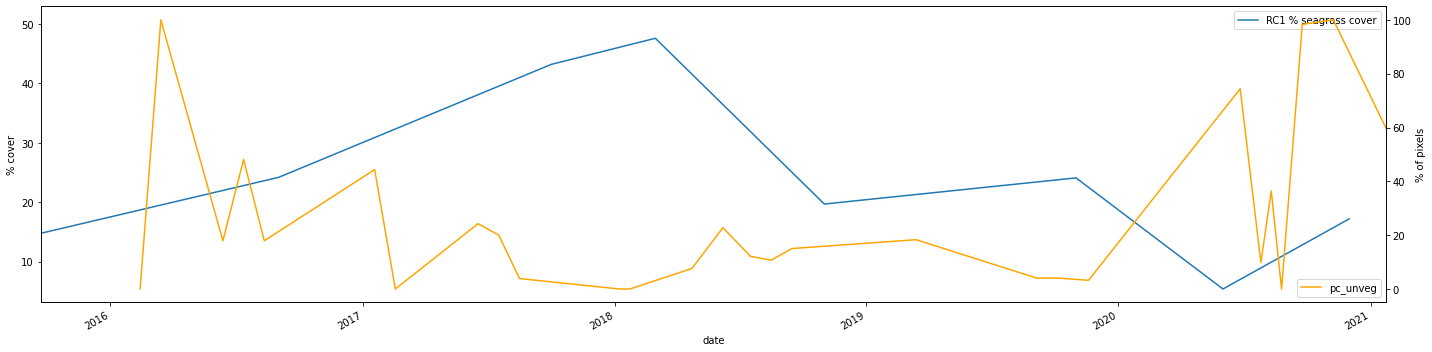

In [44]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
field_df.plot(x='time', y='RC1 % seagrass cover', kind='line', ax=ax, ylabel='% cover', xlabel='date')
# classes_df.plot(y='pc_ndvi_low', kind='line', ax=ax, xlabel='date')
ax.set_xlim(xmin=16700, xmax=18650)

# ax2 = ax.twinx()
# classes_df2.plot(y='pc_ndvi_low', kind='line', ax=ax2, xlabel='date', ylabel = '% of pixels', color='orange')

ax2 = ax.twinx()
classes_df2.plot(y='pc_unveg', kind='line', ax=ax2, xlabel='date', ylabel = '% of pixels', color='orange')

ax.legend(loc='best')#, framealpha=0.0)#, bbox_to_anchor=(1.00,1.00))
ax2.legend(loc='lower right')#, framealpha=0.0)#, bbox_to_anchor=(1.00,1.00))
# ax3.legend(loc='right')

# ax1.set_ylim(ymax=50)
# ax3.set_ylim(ymax=50)
# ax5.set_ylim(ymax=50)
plt.tight_layout()
plt.plot()

[]

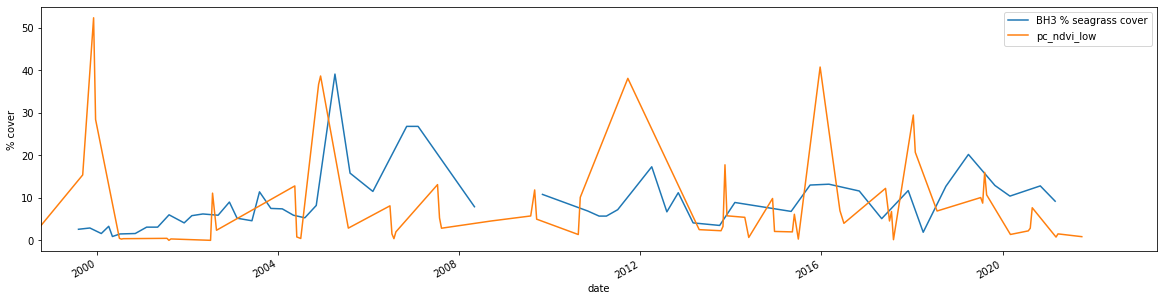

In [76]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
field_df.plot(x='time', y='BH3 % seagrass cover', kind='line', ax=ax, ylabel='% cover', xlabel='date')
classes_df.plot(y='pc_ndvi_low', kind='line', ax=ax, xlabel='date')
ax.set_xlim(xmin=10500)

# ax1.set_ylim(ymax=50)
# ax3.set_ylim(ymax=50)
# ax5.set_ylim(ymax=50)

plt.plot()

<AxesSubplot:xlabel='time'>

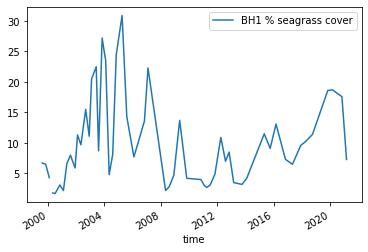

In [10]:
field_df.plot(x='time', y='BH1 % seagrass cover')

<AxesSubplot:xlabel='key_0'>

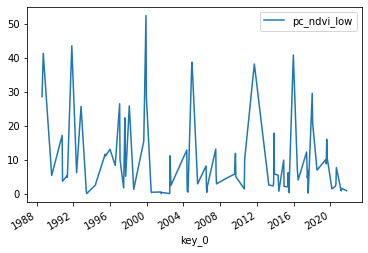

In [22]:
classes_df.plot(y='pc_ndvi_low')#, xlim=(2000, 2022))
# classes_df

In [33]:
# print(field_df.columns)
# print(classes_df.columns)
# merge = classes_df.merge(field_df, left_on=classes_df.index, right_on=field_df.index)#, on=index)

Index(['Date', 'BH1 % seagrass cover', 'BH3 % seagrass cover',
       'BH1 Canopy height (cm)', 'BH3 Canopy height (cm)', 'BH1 % algae cover',
       'BH3 % algae cover', 'BH1 % epiphyte cover', 'BH3 % epiphyte cover',
       'time'],
      dtype='object')


In [35]:
classes_df.index
# merge

DatetimeIndex(['1988-08-03 23:18:13.770006', '1988-09-20 23:18:13.226300',
               '1989-08-22 23:14:03.158331', '1990-10-12 23:07:06.231340',
               '1990-10-28 23:06:58.364928', '1991-04-22 23:09:31.056678',
               '1991-05-08 23:09:50.255405', '1991-10-31 23:11:36.664159',
               '1992-05-10 23:11:13.708286', '1992-11-02 23:08:46.294516',
               '1993-05-29 23:10:02.836388', '1993-06-14 23:10:01.622013',
               '1994-06-01 23:06:42.799911', '1994-06-17 23:06:21.991582',
               '1995-06-20 22:53:26.094699', '1995-07-06 22:52:42.345288',
               '1995-12-29 22:49:37.787401', '1996-07-24 23:02:24.317527',
               '1997-01-16 23:11:16.273991', '1997-02-01 23:11:59.205357',
               '1997-06-25 23:17:18.640521', '1997-07-27 23:18:23.949730',
               '1997-08-12 23:18:55.169067', '1997-09-13 23:19:52.129673',
               '1998-02-04 23:23:25.813414', '1998-07-30 23:25:50.933936',
               '1999-09-0

In [37]:
classes = classes_df['pc_ndvi_low']
field = field_df['BH1 % seagrass cover']
classes

key_0
1988-08-03 23:18:13.770006    28.493558
1988-09-20 23:18:13.226300    41.236118
1989-08-22 23:14:03.158331     5.303030
1990-10-12 23:07:06.231340    17.128954
1990-10-28 23:06:58.364928     3.634361
                                ...    
2020-08-11 23:47:28.993986     2.848423
2020-08-27 23:47:37.685713     7.662835
2021-03-07 23:47:25.709191     0.764818
2021-03-23 23:47:18.643881     1.515152
2021-10-01 23:47:52.073395     0.861450
Name: pc_ndvi_low, Length: 91, dtype: float64

In [51]:
# classes['date'] = pd.to_datetime(classes.index)

# classes.head()
# type(classes)
classes = pd.DataFrame(classes)
classes.reset_index(drop=False, inplace=True)


In [52]:
classes

,key_0,pc_ndvi_low
0,1988-08-03 23:18:13.770006,28.493558
1,1988-09-20 23:18:13.226300,41.236118
2,1989-08-22 23:14:03.158331,5.30303
3,1990-10-12 23:07:06.231340,17.128954
4,1990-10-28 23:06:58.364928,3.634361
...,...,...
87,2020-08-27 23:47:37.685713,7.662835
88,2021-03-07 23:47:25.709191,0.764818
89,2021-03-23 23:47:18.643881,1.515152
90,2021-10-01 23:47:52.073395,0.86145


In [39]:
field.head()

time
1999-08-01    6.7
1999-11-01    6.5
2000-02-01    4.3
2000-04-01    NaN
2000-05-01    1.8
Name: BH1 % seagrass cover, dtype: float64

In [45]:
field.head()

time
1999-08-01    6.7
1999-11-01    6.5
2000-02-01    4.3
2000-04-01    NaN
2000-05-01    1.8
Name: BH1 % seagrass cover, dtype: float64

In [40]:
merge = pd.merge(classes, field, how='outer', on = index)
merge

NameError: name 'index' is not defined